## Demo of `RA_NLP.py`

In [1]:
from RA_NLP import NLP_Trainer, converter

In [2]:
import pickle

In [3]:
with open("df.pkl", 'rb') as F:
    df = pickle.load(F)
    
df.shape

(163, 6)

### To convert the string of expression inside DF from DB into original Python object

In [4]:
from ast import literal_eval as LE

In [5]:
TRAIN_DATA = [
    converter(row.doc_body, 
              LE(row.entities), 
              LE(row.classifiers), 
              2) 
    for row in list(df.itertuples())
]

In [6]:
TRAIN_DATA[0]

('Analysts at OpenSignal (UK) has published a ranking of countries with the fastest mobile Internet. They also showed how to relate the time usage of the mobile Internet and Wi-Fi, and compared the speed of Internet connections in General.\n\nFastest mobile Internet in South Korea: access 3G / 4G / LTE is on 97 % of the country. The five leaders also include Japan, Hong Kong, Kuwait, Netherlands, followed by Singapore, United States, Taiwan, Sweden and China.',
 {'entities': [(12, 22, 'ORG'),
   (24, 26, 'GPE'),
   (266, 277, 'GPE'),
   (286, 287, 'CARDINAL'),
   (306, 310, 'PERCENT'),
   (331, 335, 'CARDINAL'),
   (357, 362, 'GPE'),
   (364, 373, 'GPE'),
   (375, 381, 'GPE'),
   (383, 394, 'GPE'),
   (408, 417, 'GPE'),
   (419, 432, 'GPE'),
   (434, 440, 'GPE'),
   (442, 448, 'GPE'),
   (453, 458, 'GPE')],
  'cats': {'Other': 0,
   'Power': 0,
   'Mining': 0,
   'Services': 0,
   'Info/Comm': 0,
   'Agriculture': 0,
   'Real Estate': 0,
   'Professional': 0,
   'Manufacturing': 0,
   

In [11]:
import spacy

In [12]:
en_large = spacy.load('eng_large')

In [13]:
en_large

## Demo data using Kaggle sentiment

In [14]:
import pandas as pd
df = pd.read_csv('/home/oceanbao/HACKING/MISC/BACKUP/kaggle_train_clean.csv')

import copy

df.dropna(inplace=True)
df.sentences.notna().value_counts()
df['label'] = df['sentiment'].apply(lambda x: {'cats': {'POS': 1, 'NEG': 0}} if x == 1 else {'cats': {'POS': 0, 'NEG': 1}} )
df['input'] = df.apply(lambda x: (x['sentences'], x['label']), axis=1)
df.head()

,sentences,sentiment,id,label,input
0,béart berling superb huppert magnificent,1,0,"{'cats': {'POS': 1, 'NEG': 0}}","(béart berling superb huppert magnificent, {'c..."
1,coming age story cautionary parable perfectly ...,1,1,"{'cats': {'POS': 1, 'NEG': 0}}",(coming age story cautionary parable perfectly...
2,end movie year old nephew said guess come brok...,1,2,"{'cats': {'POS': 1, 'NEG': 0}}",(end movie year old nephew said guess come bro...
3,can pronounce gyro correctly you appreciate va...,1,3,"{'cats': {'POS': 1, 'NEG': 0}}",(can pronounce gyro correctly you appreciate v...
4,immensely entertaining look unsung heroes 20th...,1,4,"{'cats': {'POS': 1, 'NEG': 0}}",(immensely entertaining look unsung heroes 20t...


## `NLP_Trainer` has default not multilabel (non-exclusive)

In [15]:
trainer = NLP_Trainer(
    df.input.values,
    model=en_large, 
    pipelines=['textcat'], 
    train_ratio=0.8,
    epoch=10,
    batch=16,
    multilabel=False,
    )

## Main methods/data under class

1. First call `.prep_data()`
2. Then train `.start_train()`

In [16]:
trainer.prep_data()

Using 8527 examples (6821 training, 1706 evaluation)


In [17]:
trainer.textcat.labels

('POS', 'NEG')

In [18]:
trainer.start_train()

Begin training the model...
=== Running epoch: 1 of 10 ===


/home/oceanbao/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Finish epoch with elapsed time: 23.94108819961548

>>> TextCat Loss : 16.368013825034723

=== Running epoch: 2 of 10 ===

Finish epoch with elapsed time: 14.348771810531616

>>> TextCat Loss : 1.272208258509636

=== Running epoch: 3 of 10 ===

Finish epoch with elapsed time: 17.751302242279053

>>> TextCat Loss : 0.6982137629529461

=== Running epoch: 4 of 10 ===

Finish epoch with elapsed time: 17.988375663757324

>>> TextCat Loss : 0.5907221338129602

=== Running epoch: 5 of 10 ===

Finish epoch with elapsed time: 17.916295528411865

>>> TextCat Loss : 0.5103043575654738

=== Running epoch: 6 of 10 ===

Finish epoch with elapsed time: 18.07179856300354

>>> TextCat Loss : 0.4123803114052862

=== Running epoch: 7 of 10 ===

Finish epoch with elapsed time: 17.903603315353394

>>> TextCat Loss : 0.37466548119846266

=== Running epoch: 8 of 10 ===

Finish epoch with elapsed time: 18.12263536453247

>>> TextCat Loss : 0.30110535675339634

=== Running epoch: 9 of 10 ===

Finish epoch with

### `.nlp` object is exposed

In [19]:
trainer.nlp.pipe_names

['tagger', 'parser', 'ner', 'textcat']

In [20]:
trainer.nlp.get_pipe('ner').move_names[-5:]

['U-ORDINAL', 'U-PRODUCT', 'U-LAW', 'U-LANGUAGE', 'O']

In [21]:
trainer.nlp.get_pipe('textcat').labels

('POS', 'NEG')

### Save to disk method

In [22]:
trainer.to_disk('DELE_MOD', 'Demo_Model')

Saved model to DELE_MOD


In [23]:
!rm -rf DELE_MOD/

### dataframe containing epoch-metrics

In [19]:
trainer.eval_info

,train_accu,dev_accu,train_fscore,dev_fscore,train_bal_accu,dev_bal_accu
0,0.505498,0.480070,0.002956,0.000000,0.500740,0.500000
1,0.736695,0.624853,0.659074,0.488000,0.734593,0.636519
2,0.842105,0.715123,0.842659,0.724177,0.842215,0.714951
3,0.871866,0.719812,0.873113,0.732363,0.872039,0.719086
4,0.884768,0.723916,0.888416,0.744438,0.885160,0.721862
5,0.909837,0.729191,0.911294,0.742475,0.910076,0.728292
6,0.922885,0.735053,0.924207,0.749446,0.923135,0.733929
7,0.934907,0.735053,0.935912,0.750000,0.935141,0.733835
8,0.946196,0.723329,0.946509,0.733935,0.946337,0.722889
9,0.957777,0.731536,0.957784,0.738286,0.957866,0.731670


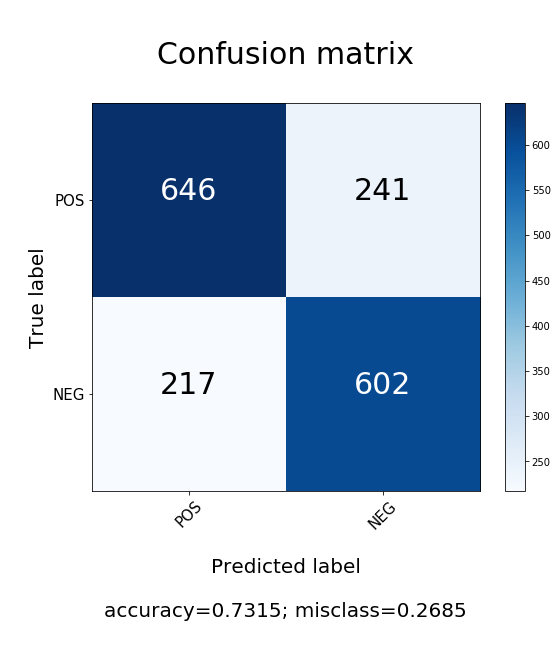

In [20]:
trainer.plot_confusion()

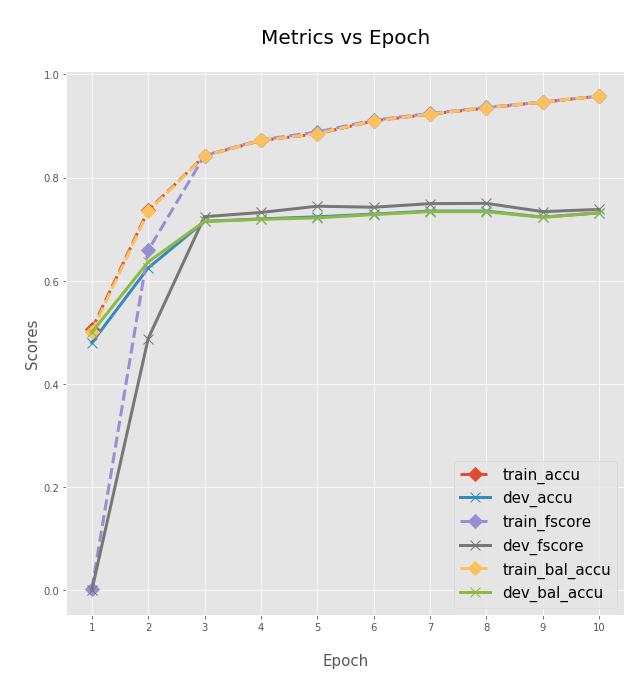

In [21]:
trainer.plot_score()

In [23]:
print(trainer.class_report)

              precision    recall  f1-score   support

         POS       0.75      0.73      0.74       887
         NEG       0.71      0.74      0.72       819

    accuracy                           0.73      1706
   macro avg       0.73      0.73      0.73      1706
weighted avg       0.73      0.73      0.73      1706



## `trainer.plot_confusion()` in case of Multilabel

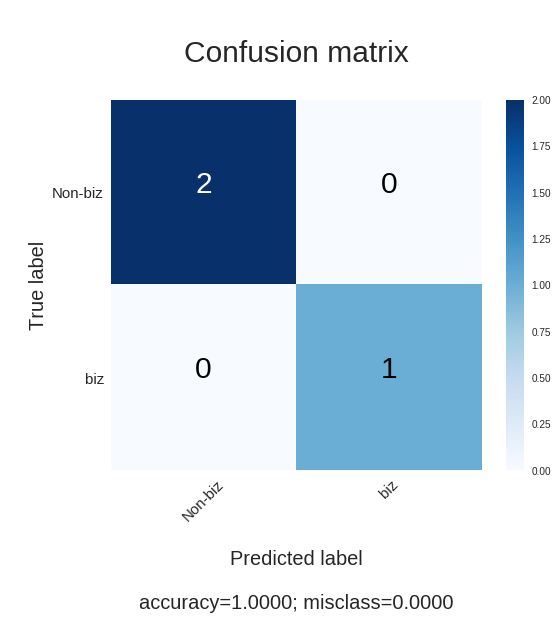

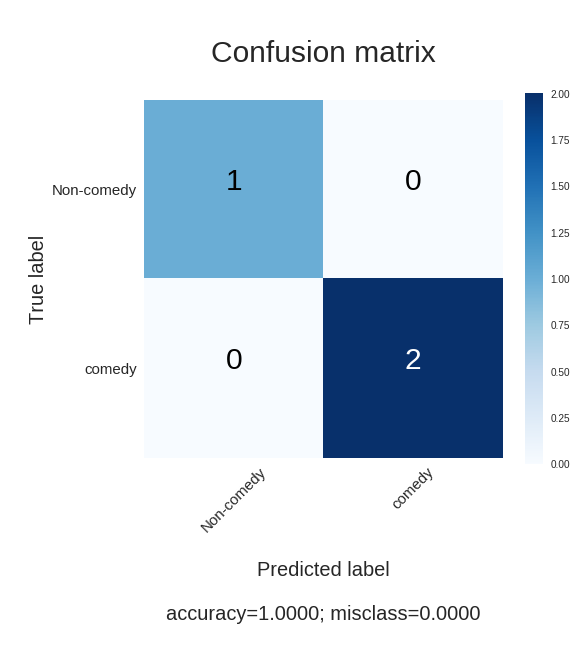

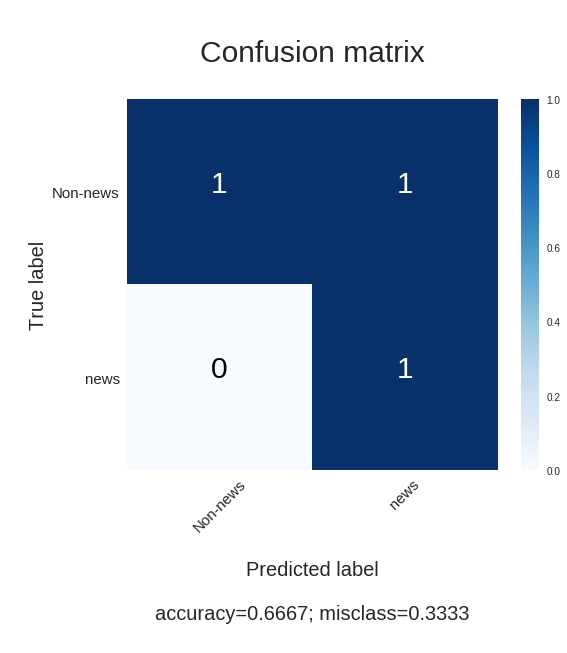

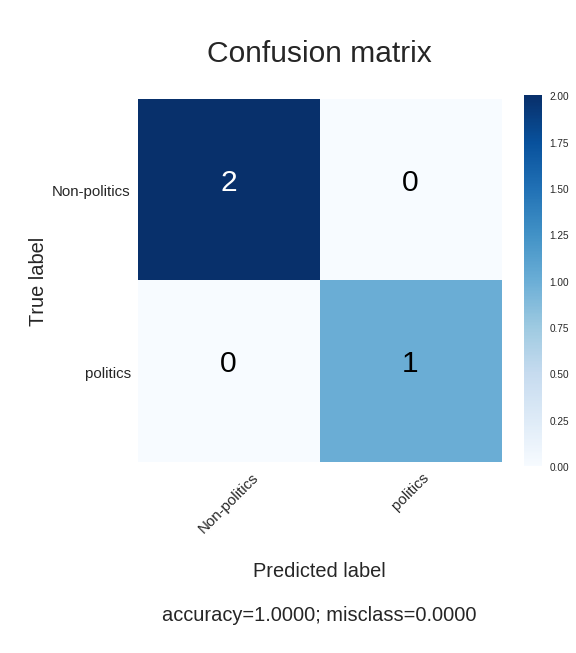

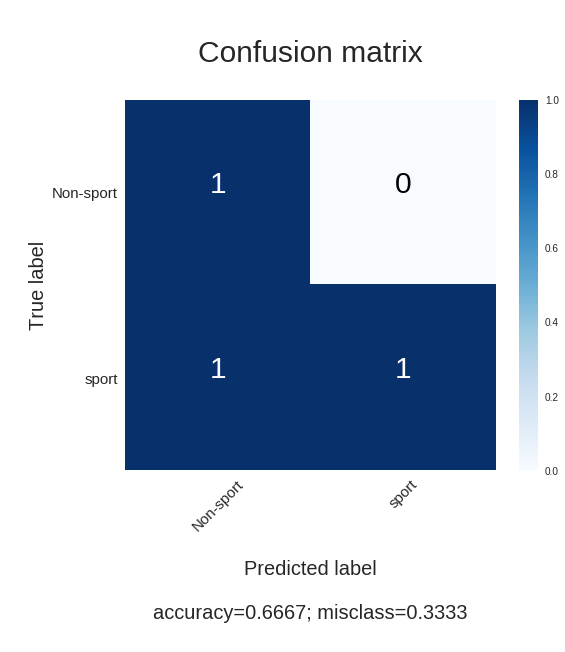

In [447]:
dele_plot(cm_multilabel, ['biz', 'comedy', 'news', 'politics', 'sport'], multilabel=True)